In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DP_dataset/
!ls

/content/drive/MyDrive/DP_dataset
insurance.csv


In [ ]:
# !pip install plotly

In [ ]:
import numpy as np
import pandas as pd

# Plotly Packages
from plotly import subplots
import plotly.graph_objs as go

In [ ]:
url = 'insurance.csv'
insurance_data = pd.read_csv(url)
insurance_data1 = insurance_data
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
charges = insurance_data["charges"].values
logcharge = np.log(insurance_data["charges"])
fig = go.Figure(data=[go.Histogram(x=charges, histnorm='probability',name="Charges",marker = dict(color = '#FA5858',))])
fig['layout'].update(showlegend=True, title='Charges', bargap=0.05)
fig.show(renderer="colab")

fig = go.Figure(data=[go.Histogram(x=logcharge, histnorm='probability',name="Normalised charges using Log",marker = dict(color = '#58FA82',))])
fig['layout'].update(showlegend=True, title='Normalised charges using Log', bargap=0.05)
fig.show(renderer="colab")

In [ ]:
age = insurance_data["bmi"].values
fig = go.Figure(data=[go.Histogram(x=age, histnorm='probability',name="Charges",marker = dict(color = '#FA5858',))])
fig['layout'].update(showlegend=True, title='Charges', bargap=0.05)
fig.show(renderer="colab")

In [ ]:
insurance_data['chargesLog'] = np.log(insurance_data["charges"])


In [ ]:
insurance_data['chargesLog'].describe()


count    1338.000000
mean        9.098659
std         0.919527
min         7.022756
25%         8.463853
50%         9.146552
75%         9.719558
max        11.063045
Name: chargesLog, dtype: float64

In [ ]:
insurance_data['discretized_age'] = np.nan
data_list = [insurance_data]

for column in data_list:
    column.loc[(column['age'] >= 18) & (column['age'] <= 35), 'discretized_age'] = 'Young Adult'
    column.loc[(column['age'] > 35) & (column['age'] <= 55), 'discretized_age'] = 'Senior Adult'
    column.loc[column['age'] > 55, 'discretized_age'] = 'Elder'


labels = insurance_data["discretized_age"].unique().tolist()
amount = insurance_data["discretized_age"].value_counts().tolist()

colors = ["#ff9999", "#b3d9ff", " #e6ffb3"]

fig = go.Figure(data=[go.Pie(labels=labels, values=amount,
                hoverinfo='label+percent', textinfo='value',
                textfont=dict(size=20),
                marker=dict(colors=colors,
                            line=dict(color='#000000', width=2)))])
fig['layout'].update(showlegend=True, title='Discretization of ages')
fig.show(renderer="colab")

In [ ]:
insurance_data['discretized_bmi'] = np.nan
data_list = [insurance_data]

for column in data_list:
    column.loc[(column['bmi']) < 18.5, 'discretized_bmi'] = "Under Weight"
    column.loc[(column['bmi'] >= 18.5) & (column['bmi'] < 24.9), 'discretized_bmi'] = 'Healthy'
    column.loc[(column['bmi'] >= 25.0) & (column['bmi'] < 29.9), 'discretized_bmi'] = 'Over Weight'
    column.loc[column['bmi'] >= 30.0 , 'discretized_bmi'] = 'Obese'


labels = insurance_data["discretized_bmi"].unique().tolist()
amount = insurance_data["discretized_bmi"].value_counts().tolist()

colors = ["#ff9999", "#b3d9ff", " #e6ffb3"]

fig = go.Figure(data=[go.Pie(labels=labels, values=amount,
                hoverinfo='label+percent', textinfo='value',
                textfont=dict(size=20),
                marker=dict(colors=colors,
                            line=dict(color='#000000', width=2)))])
fig['layout'].update(showlegend=True, title='Discretization of BMI')
fig.show(renderer="colab")

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,chargesLog,discretized_age,discretized_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176,Young Adult,Over Weight
1,18,male,33.770,1,no,southeast,1725.55230,7.453302,Young Adult,Obese
2,28,male,33.000,3,no,southeast,4449.46200,8.400538,Young Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,9.998092,Young Adult,Healthy
4,32,male,28.880,0,no,northwest,3866.85520,8.260197,Young Adult,Over Weight


In [ ]:
insurance_data.isnull().sum()


age                 0
sex                 0
bmi                 0
children            0
smoker              0
region              0
charges             0
chargesLog          0
discretized_age     0
discretized_bmi    15
dtype: int64

In [ ]:
replace_dict= {0:'female',1:'male'}
data = insurance_data.copy()
insurance_data['sex'] = insurance_data['sex'].map(dict(zip(['male','female'],[0,1])))
insurance_data['smoker'] = insurance_data['smoker'].map(dict(zip(['no','yes'],[0,1])))
insurance_data['region'] = insurance_data['region'].map(dict(zip(['southwest','southeast','northwest','northeast'],[1,2,3,4])))
insurance_data['discretized_age_0'] = insurance_data['discretized_age'].map(dict(zip(['Young Adult','Senior Adult','Elder'],[0,1,2])))

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,chargesLog,discretized_age,discretized_bmi,discretized_age_0
0,19,1,27.900,0,1,1,16884.92400,9.734176,Young Adult,Over Weight,0
1,18,0,33.770,1,0,2,1725.55230,7.453302,Young Adult,Obese,0
2,28,0,33.000,3,0,2,4449.46200,8.400538,Young Adult,Obese,0
3,33,0,22.705,0,0,3,21984.47061,9.998092,Young Adult,Healthy,0
4,32,0,28.880,0,0,3,3866.85520,8.260197,Young Adult,Over Weight,0


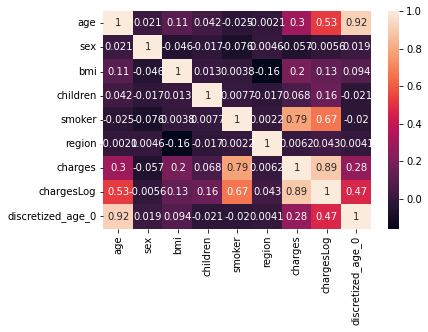

In [ ]:
import seaborn as sns
corrMatrix = insurance_data.corr()
sns.heatmap(corrMatrix,annot=True)

In [ ]:
from plotly import subplots
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

corr = insurance_data.corr()
corr = corr.round(3)
print(type(corr))


ff.create_annotated_heatmap(z=corr.to_numpy(),
            x=corr.columns.tolist(),
            y=corr.index.tolist(),
            zmax=1, zmin=-1,
            showscale=True,
            hoverongaps=True)

<class 'pandas.core.frame.DataFrame'>


In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,chargesLog,discretized_age,discretized_bmi,discretized_age_0
0,19,1,27.900,0,1,1,16884.92400,9.734176,Young Adult,Over Weight,0
1,18,0,33.770,1,0,2,1725.55230,7.453302,Young Adult,Obese,0
2,28,0,33.000,3,0,2,4449.46200,8.400538,Young Adult,Obese,0
3,33,0,22.705,0,0,3,21984.47061,9.998092,Young Adult,Healthy,0
4,32,0,28.880,0,0,3,3866.85520,8.260197,Young Adult,Over Weight,0


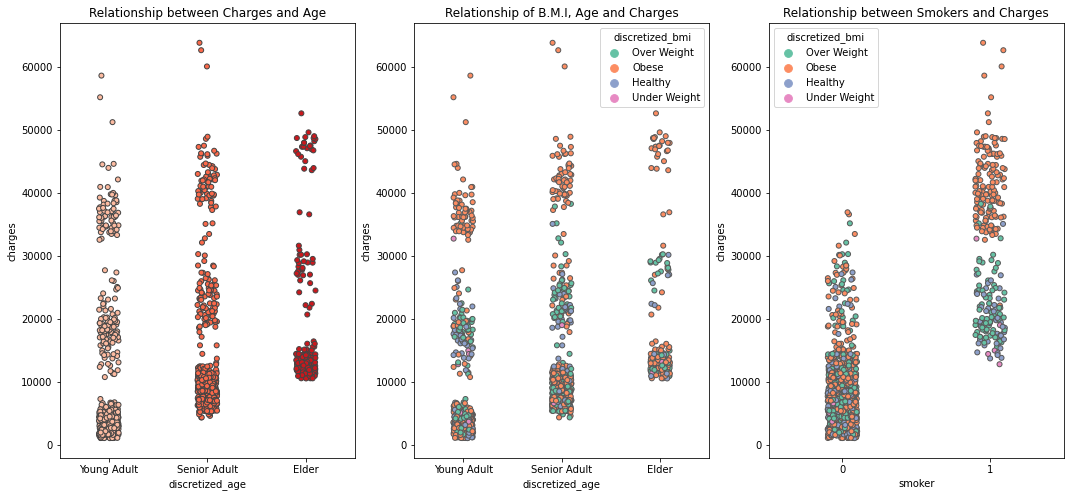

In [ ]:
import matplotlib.pyplot as plt

f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,8))

sns.stripplot(x="discretized_age", y="charges", data=insurance_data, ax=ax1, linewidth=1, palette="Reds")
ax1.set_title("Relationship between Charges and Age")


sns.stripplot(x="discretized_age", y="charges", hue="discretized_bmi", data=insurance_data, ax=ax2, linewidth=1, palette="Set2")
ax2.set_title("Relationship of B.M.I, Age and Charges")

sns.stripplot(x="smoker", y="charges", hue="discretized_bmi", data=insurance_data, ax=ax3, linewidth=1, palette="Set2")
ax3.set_title("Relationship between Smokers and Charges")

plt.show()

Text(0.5, 1.0, 'Relationship between Charges and BMI by Smoking Condition')

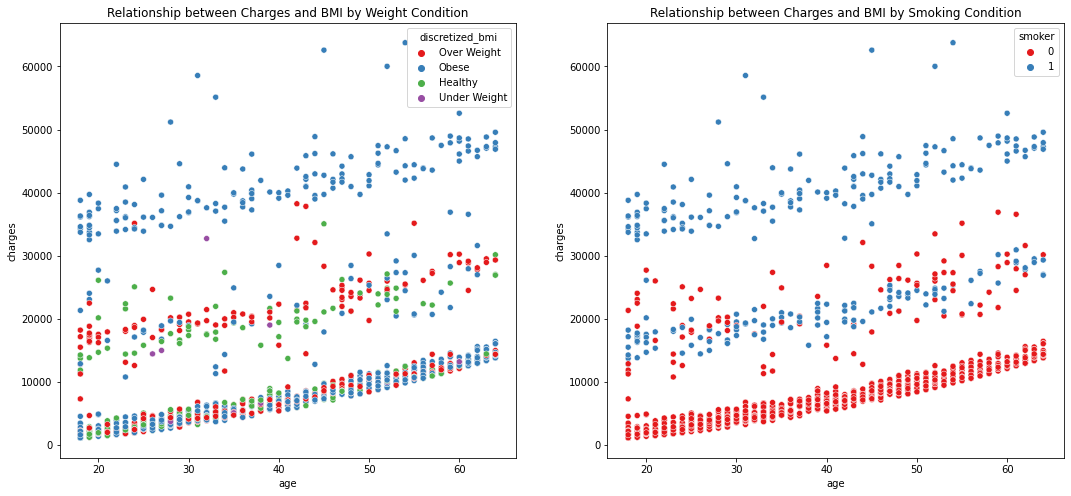

In [ ]:
# Two subplots one with weight condition and the other with smoker.

f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,8))
sns.scatterplot(x="age", y="charges", hue="discretized_bmi", data=insurance_data, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Charges and BMI by Weight Condition")
# ax1.annotate('Obese Cluster \n (Does this cluster has \n the Smoking Attribute?)', xy=(1, 1), xytext=(1, 1),
#             arrowprops=dict(facecolor='black'),
#             fontsize=12)
sns.scatterplot(x="age", y="charges", hue="smoker", data=insurance_data, palette="Set1", ax=ax2)
ax2.set_title("Relationship between Charges and BMI by Smoking Condition")
# ax2.annotate('Obese Smoker Cluster ', xy=(1, 1), xytext=(1, 1),
#             arrowprops=dict(facecolor='black'),
#             fontsize=12)
# ax2.annotate('The Impact of Smoking to \n Charges on other \n Weight Conditions ', xy=(26, 7), xytext=(1, 1),
#             arrowprops=dict(facecolor='black'),
#             fontsize=12)

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,chargesLog,discretized_age,discretized_bmi,discretized_age_0
0,19,1,27.900,0,1,1,16884.92400,9.734176,Young Adult,Over Weight,0
1,18,0,33.770,1,0,2,1725.55230,7.453302,Young Adult,Obese,0
2,28,0,33.000,3,0,2,4449.46200,8.400538,Young Adult,Obese,0
3,33,0,22.705,0,0,3,21984.47061,9.998092,Young Adult,Healthy,0
4,32,0,28.880,0,0,3,3866.85520,8.260197,Young Adult,Over Weight,0


In [ ]:
avg_ya_charge = insurance_data["charges"].loc[insurance_data["discretized_age"] == "Young Adult"].mean()
avg_sa_charge = insurance_data["charges"].loc[insurance_data["discretized_age"] == "Senior Adult"].mean()
avg_e_charge = insurance_data["charges"].loc[insurance_data["discretized_age"] == "Elder"].mean()

# Median
med_ya_charge = insurance_data["charges"].loc[insurance_data["discretized_age"] == "Young Adult"].median()
med_sa_charge = insurance_data["charges"].loc[insurance_data["discretized_age"] == "Senior Adult"].median()
med_e_charge = insurance_data["charges"].loc[insurance_data["discretized_age"] == "Elder"].median()

average_plot = go.Bar(
    x=['Young Adults', 'Senior Adults', 'Elder'],
    y=[avg_ya_charge, avg_sa_charge, avg_e_charge],
    name='Mean',
    marker=dict(
        color="#F5B041"
    )
)
med_plot = go.Bar(
    x=['Young Adults', 'Senior Adults', 'Elder'],
    y=[med_ya_charge, med_sa_charge, med_e_charge],
    name='Median',
    marker=dict(
        color="#48C9B0"
    )
)


fig = subplots.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('Average Charge by Age','Median Charge by Age'),
                         shared_yaxes=True, print_grid=False)


fig.append_trace(average_plot, 1, 1)
fig.append_trace(med_plot, 1, 2)


fig['layout'].update(showlegend=True, title='Age Charges', xaxis=dict(title="Age Category"), yaxis=dict(title="Patient Charges"), bargap=0.15)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [ ]:
avg_ya_charge = insurance_data["charges"].loc[insurance_data["discretized_bmi"] == "Overweight"].mean()
avg_sa_charge = insurance_data["charges"].loc[insurance_data["discretized_bmi"] == "Obese"].mean()
avg_e_charge = insurance_data["charges"].loc[insurance_data["discretized_bmi"] == "Healthy"].mean()
avg_u_charge = insurance_data["charges"].loc[insurance_data["discretized_bmi"] == "Underweight"].mean()

# Median
med_ya_charge = insurance_data["charges"].loc[insurance_data["discretized_bmi"] == "Overweight"].median()
med_sa_charge = insurance_data["charges"].loc[insurance_data["discretized_bmi"] == "Obese"].median()
med_e_charge = insurance_data["charges"].loc[insurance_data["discretized_bmi"] == "Healthy"].median()
med_u_charge = insurance_data["charges"].loc[insurance_data["discretized_bmi"] == "Underweight"].median()

average_plot = go.Bar(
    x=['Overweight', 'Obese', 'Healthy', 'Underweight'],
    y=[avg_ya_charge, avg_sa_charge, avg_e_charge,avg_u_charge],
    name='Mean',
    marker=dict(
        color="#F5B041"
    )
)
med_plot = go.Bar(
    x=['Overweight', 'Obese', 'Healthy', 'Underweight'],
    y=[med_ya_charge, med_sa_charge, med_e_charge, med_u_charge],
    name='Median',
    marker=dict(
        color="#48C9B0"
    )
)


fig = subplots.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('Average Charge by BMI','Median Charge by BMI'),
                         shared_yaxes=True, print_grid=False)


fig.append_trace(average_plot, 1, 1)
fig.append_trace(med_plot, 1, 2)


fig['layout'].update(showlegend=True, title='BMI Charges', xaxis=dict(title="BMI Category"), yaxis=dict(title="Patient Charges"), bargap=0.15)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [ ]:
chargedist_sm = insurance_data["charges"].loc[(insurance_data["discretized_bmi"] == "Obese") & (insurance_data["smoker"] == 1)].values
chargedist_nsm = insurance_data["charges"].loc[(insurance_data["discretized_bmi"] == "Obese") & (insurance_data["smoker"] == 0)].values

trace0 = go.Box(
    y=chargedist_sm,
    name = 'Obese Smokers',
    marker = dict(
        color = '#DF0101',
    )
)
trace1 = go.Box(
    y=chargedist_nsm,
    name = 'Obese Non-Smokers',
    marker = dict(
        color = '#00FF40',
    )
)


data = [trace0, trace1]


layout = dict(title="Deeper Look into Obese condition by Smoking status",
             xaxis=dict(
             title="Status",
             titlefont=dict(
             size=16)),
             yaxis=dict(title="Patient Charges",
                       titlefont=dict(size=16)),
              )

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
obese_smoker = insurance_data.loc[(insurance_data["discretized_bmi"] == "Obese") & (insurance_data["smoker"] == 1)]
obese_nonsmoker = insurance_data.loc[(insurance_data["discretized_bmi"] == "Obese") & (insurance_data["smoker"] == 0)]


trace0 = go.Scatter(
    x = obese_smoker["age"].values,
    y = obese_smoker["charges"].values,
    name = 'Smokers',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = '#DF0101',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = obese_nonsmoker["age"].values,
    y = obese_nonsmoker["charges"].values,
    name = 'Non-Smokers',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = '#00FF40',
        line = dict(
            width = 2,
        )
    )
)

data = [trace0, trace1]

layout = dict(title = 'Clear Separation between Obese Smokers and Non-Smokers in Charges',
              yaxis = dict(zeroline = False,
                          title="Patient Charges",
                          titlefont=dict(size=16)),
              xaxis = dict(zeroline = False,
                          title="Age of the Patient",
                          titlefont=dict(
                          size=16))
             )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

In [ ]:
avg_ya_charge = insurance_data["charges"].loc[insurance_data["region"] == 1].mean()
avg_sa_charge = insurance_data["charges"].loc[insurance_data["region"] == 2].mean()
avg_e_charge = insurance_data["charges"].loc[insurance_data["region"] == 3].mean()
avg_u_charge = insurance_data["charges"].loc[insurance_data["region"] == 4].mean()

# Median
med_ya_charge = insurance_data["charges"].loc[insurance_data["region"] == 1].median()
med_sa_charge = insurance_data["charges"].loc[insurance_data["region"] == 2].median()
med_e_charge = insurance_data["charges"].loc[insurance_data["region"] == 3].median()
med_u_charge = insurance_data["charges"].loc[insurance_data["region"] == 4].median()

average_plot = go.Bar(
    x=['SouthWest', 'SouthEast', 'NorthWest', 'NorthEast'],
    y=[avg_ya_charge, avg_sa_charge, avg_e_charge,avg_u_charge],
    name='Mean',
    marker=dict(
        color="#F5B041"
    )
)
med_plot = go.Bar(
    x=['SouthWest', 'SouthEast', 'NorthWest', 'NorthEast'],
    y=[med_ya_charge, med_sa_charge, med_e_charge, med_u_charge],
    name='Median',
    marker=dict(
        color="#48C9B0"
    )
)


fig = subplots.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('Average Charge by Region','Median Charge by Region'),
                         shared_yaxes=True, print_grid=False)


fig.append_trace(average_plot, 1, 1)
fig.append_trace(med_plot, 1, 2)


fig['layout'].update(showlegend=True, title='Region Charges', xaxis=dict(title="Region Category"), yaxis=dict(title="Patient Charges"), bargap=0.15)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

Text(0.5, 1.0, 'Region = NorthEast')

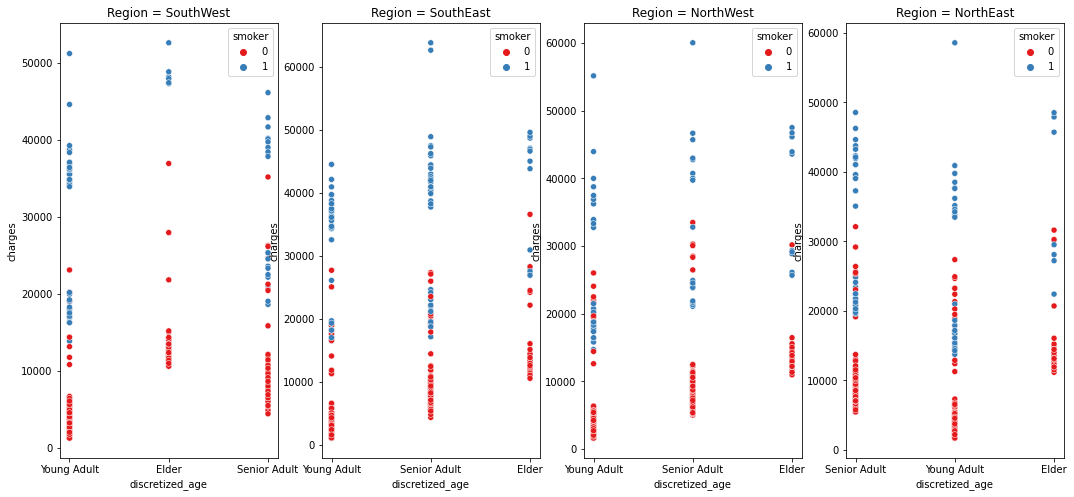

In [ ]:
# Two subplots one with weight condition and the other with smoker.

f, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(18,8))
region1 = insurance_data.loc[insurance_data["region"] == 1]
region2 = insurance_data.loc[insurance_data["region"] == 2]
region3 = insurance_data.loc[insurance_data["region"] == 3]
region4 = insurance_data.loc[insurance_data["region"] == 4]
sns.scatterplot(x="discretized_age", y="charges", hue="smoker", data=region1, palette="Set1", ax=ax1)
ax1.set_title("Region = SouthWest")

sns.scatterplot(x="discretized_age", y="charges", hue="smoker", data=region2, palette="Set1", ax=ax2)
ax2.set_title("Region = SouthEast")

sns.scatterplot(x="discretized_age", y="charges", hue="smoker", data=region3, palette="Set1", ax=ax3)
ax3.set_title("Region = NorthWest")

sns.scatterplot(x="discretized_age", y="charges", hue="smoker", data=region4, palette="Set1", ax=ax4)
ax4.set_title("Region = NorthEast")
# ax2.annotate('Obese Smoker Cluster ', xy=(1, 1), xytext=(1, 1),
#             arrowprops=dict(facecolor='black'),
#             fontsize=12)
# ax2.annotate('The Impact of Smoking to \n Charges on other \n Weight Conditions ', xy=(26, 7), xytext=(1, 1),
#             arrowprops=dict(facecolor='black'),
#             fontsize=12)

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,chargesLog,discretized_age,discretized_bmi,discretized_age_0
0,19,1,27.900,0,1,1,16884.92400,9.734176,Young Adult,Over Weight,0
1,18,0,33.770,1,0,2,1725.55230,7.453302,Young Adult,Obese,0
2,28,0,33.000,3,0,2,4449.46200,8.400538,Young Adult,Obese,0
3,33,0,22.705,0,0,3,21984.47061,9.998092,Young Adult,Healthy,0
4,32,0,28.880,0,0,3,3866.85520,8.260197,Young Adult,Over Weight,0


In [ ]:
import numpy as np
import pandas as pd

# Plotly Packages
from plotly import subplots
import plotly.graph_objs as go

In [ ]:
url = 'insurance.csv'
insurance_data = pd.read_csv(url)
insurance_data1 = insurance_data
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# 1st we handle the categorical variables by using dummy variables
import pandas as pd
import numpy as np

dum_df = pd.get_dummies(insurance_data1, columns=["sex","smoker","region"], prefix=["Sex_is","Is_a_smoker","Region_is"],drop_first=True )

In [ ]:
dum_df.head()

,age,bmi,children,charges,chargesLog,discretized_age,discretized_bmi,discretized_age_0,Sex_is_1,Is_a_smoker_1,Region_is_2,Region_is_3,Region_is_4
0,19,27.900,0,16884.92400,9.734176,Young Adult,Over Weight,0,1,1,0,0,0
1,18,33.770,1,1725.55230,7.453302,Young Adult,Obese,0,0,0,1,0,0
2,28,33.000,3,4449.46200,8.400538,Young Adult,Obese,0,0,0,1,0,0
3,33,22.705,0,21984.47061,9.998092,Young Adult,Healthy,0,0,0,0,1,0
4,32,28.880,0,3866.85520,8.260197,Young Adult,Over Weight,0,0,0,0,1,0


In [ ]:
#separate the other attributes from the predicting attribute
x = dum_df.drop(['charges','discretized_age','discretized_bmi','chargesLog'],axis=1)
#separte the predicting attribute into Y for model training
#y =dum_df['charges']

In [ ]:
x.head()

,age,bmi,children,discretized_age_0,Sex_is_1,Is_a_smoker_1,Region_is_2,Region_is_3,Region_is_4
0,19,27.900,0,0,1,1,0,0,0
1,18,33.770,1,0,0,0,1,0,0
2,28,33.000,3,0,0,0,1,0,0
3,33,22.705,0,0,0,0,0,1,0
4,32,28.880,0,0,0,0,0,1,0


In [ ]:
y =dum_df['chargesLog']
y.head()

0    9.734176
1    7.453302
2    8.400538
3    9.998092
4    8.260197
Name: chargesLog, dtype: float64

In [ ]:
# importing train_test_split from sklearn
import sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
#random_state ~ set.seed

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_prediction =  LR.predict(x_test)
# y_prediction

In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 score is",score)
print("mean_sqrd_error is " ,mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is 0.7887499495788656
mean_sqrd_error is  0.17770060103646354
root_mean_squared error of is 0.4215454910640885


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print("mean_sqrd_error is " ,mean_squared_error(y_test,predictions))
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mean_sqrd_error is  0.1350422540236339
Mean Absolute Error: 0.19 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 97.91 %.


In [ ]:
r2_test = r2_score(y_test, predictions)
print("R2 score of test set is {}".format(r2_test))

R2 score of test set is 0.8394620907015248


In [ ]:
dum_df.head()

,age,bmi,children,charges,chargesLog,discretized_age,discretized_bmi,discretized_age_0,Sex_is_1,Is_a_smoker_1,Region_is_2,Region_is_3,Region_is_4
0,19,27.900,0,16884.92400,9.734176,Young Adult,Over Weight,0,1,1,0,0,0
1,18,33.770,1,1725.55230,7.453302,Young Adult,Obese,0,0,0,1,0,0
2,28,33.000,3,4449.46200,8.400538,Young Adult,Obese,0,0,0,1,0,0
3,33,22.705,0,21984.47061,9.998092,Young Adult,Healthy,0,0,0,0,1,0
4,32,28.880,0,3866.85520,8.260197,Young Adult,Over Weight,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x = dum_df.drop(['charges','discretized_age','discretized_bmi'], axis = 1)
y = dum_df.chargesLog
pol = PolynomialFeatures (degree = 7)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

5.0341663537326475
[-3.67641577e-08 -1.72546793e-08 -4.55206164e-09 ...  0.00000000e+00
  0.00000000e+00 -3.09588419e-11]
0.8364108997569533


In [ ]:
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 0.1154809198639352
Mean Squared Error: 0.13737704335466938
Root Mean Squared Error: 0.37064409256680375


In [ ]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

df

,Actual,Predicted
578,9.182407,9.182627
610,9.053417,9.053405
569,10.729898,11.570932
1034,9.468857,9.474718
198,9.174117,9.225671
...,...,...
1084,9.617122,9.615072
726,8.804578,8.804508
1132,9.938325,12.564763
725,10.619678,10.361968


In [ ]:
r2_test = r2_score(y_test, y_test_pred)
print("R2 score of test set is {}".format(r2_test))

R2 score of test set is 0.8364108997569533


In [ ]:
insurance_data1.head()

,age,sex,bmi,children,smoker,region,charges,chargesLog,discretized_age,discretized_bmi,discretized_age_0
0,19,1,27.900,0,1,1,16884.92400,9.734176,Young Adult,Over Weight,0
1,18,0,33.770,1,0,2,1725.55230,7.453302,Young Adult,Obese,0
2,28,0,33.000,3,0,2,4449.46200,8.400538,Young Adult,Obese,0
3,33,0,22.705,0,0,3,21984.47061,9.998092,Young Adult,Healthy,0
4,32,0,28.880,0,0,3,3866.85520,8.260197,Young Adult,Over Weight,0


In [ ]:
insurance_data1['charges'].describe()


count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<ipython-input-68-b05e00df374f>:18: MatplotlibDeprecationWarning:

Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.



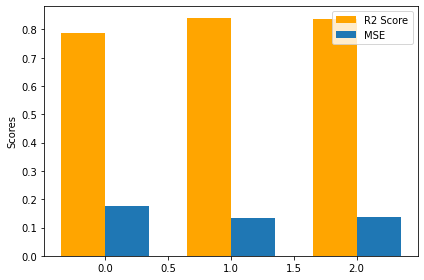

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Linear Regression', 'Random Forest', 'Polynomial Regression']
men_means = [0.7887, 0.8394, 0.8364]
women_means = [0.1777,0.1350,0.1373]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='R2 Score',color="orange")
rects2 = ax.bar(x + width/2, women_means, width, label='MSE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_xticks(x, labels)
ax.legend()


fig.tight_layout()

plt.show()
